# Table of Contents

1. [Merging datasets](#1-bullet) <br>
    I - [Customers and orders](#2-bullet) <br>
    II - [Translation of products categories](#3-bullet) <br>
    III - [Order_items and products](#4-bullet) <br>
    IV - [Data and df_temp_new](#5-bullet) <br>
    V - [Data and order_reviews](#6-bullet) <br>
    VI - [Data and order_payments](#7-bullet) <br>
    VII - [Data and sellers](#8-bullet) <br>
    <br>
    
2. [Cleaning](#9-bullet) <br>
    I - [Types](#10-bullet) <br>
    II - [Outliers](#11-bullet) <br>
    III - [Missing values](#12-bullet) <br>
    <br>

3. [Exploratory analysis](#13-bullet) <br>
    I - [Distributions](#14-bullet) <br>
    II - [Correlations](#15-bullet) <br>
    <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.pyplot as plt
import seaborn as sns

from functions import *

In [2]:
# Loading datas

customers = pd.read_csv('olist_customers_dataset.csv', sep=',')
geolocation = pd.read_csv('olist_geolocation_dataset.csv', sep=',')
order_items = pd.read_csv('olist_order_items_dataset.csv', sep=',')
order_payments = pd.read_csv('olist_order_payments_dataset.csv', sep=',')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep=',')
orders = pd.read_csv('olist_orders_dataset.csv', sep=',')
products = pd.read_csv('olist_products_dataset.csv', sep=',')
sellers = pd.read_csv('olist_sellers_dataset.csv', sep=',')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv', sep=',')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_row', 50)

# 1. Merging datasets <a class="anchor" id="1-bullet"></a>

We will try to extract all relevant information on customers on one unique dataset

## I - Customers and orders <a class="anchor" id="2-bullet"></a>

In [4]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customers.shape

(99441, 5)

In [6]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

### a. Adding latitude and longitude with geolocation

In [7]:
geolocation.shape

(1000163, 5)

In [8]:
len(geolocation['geolocation_zip_code_prefix'].unique())

19015

In [9]:
geolocation[geolocation.duplicated(subset='geolocation_zip_code_prefix')]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
2,1046,-23.546129,-46.642951,sao paulo,SP
10,1013,-23.547325,-46.634184,sao paulo,SP
13,1012,-23.548946,-46.634671,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
15,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [10]:
# We have several rows for each zip code with more or less the same coordinates, 
# we will create a simplified df with only one row per zip code with the mean value

simplified_geolocation = pd.DataFrame()

simplified_geolocation['geolocation_lat'] = geolocation.groupby(by='geolocation_zip_code_prefix')['geolocation_lat'].mean()
simplified_geolocation['geolocation_lng'] = geolocation.groupby(by='geolocation_zip_code_prefix')['geolocation_lng'].mean()
simplified_geolocation['geolocation_zip_code_prefix'] = simplified_geolocation.index

simplified_geolocation.head()

,geolocation_lat,geolocation_lng,geolocation_zip_code_prefix
geolocation_zip_code_prefix,,,
1001,-23.550190,-46.634024,1001
1002,-23.548146,-46.634979,1002
1003,-23.548994,-46.635731,1003
1004,-23.549799,-46.634757,1004
1005,-23.549456,-46.636733,1005


In [11]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [12]:
customers.shape

(99441, 5)

In [13]:
# Looking if every zip code is in simplified_geolocation
set(list(customers['customer_zip_code_prefix'].unique())) - set(simplified_geolocation['geolocation_zip_code_prefix'].unique())

{2140,
 6930,
 7412,
 7430,
 7729,
 7784,
 8342,
 8980,
 11547,
 12332,
 12770,
 13307,
 17390,
 19740,
 25840,
 25919,
 27980,
 28120,
 28160,
 28388,
 28530,
 28575,
 28617,
 28655,
 29196,
 29718,
 29949,
 35104,
 35242,
 35408,
 36248,
 36596,
 36857,
 36956,
 37005,
 38627,
 38710,
 39103,
 41098,
 41347,
 42716,
 42843,
 43870,
 44135,
 48504,
 49870,
 55027,
 55863,
 56327,
 56485,
 57254,
 58286,
 58734,
 59299,
 59547,
 61906,
 62625,
 62898,
 64047,
 64095,
 64605,
 65137,
 65830,
 67105,
 68511,
 68629,
 70316,
 70324,
 70333,
 70686,
 70701,
 70702,
 70716,
 71208,
 71261,
 71539,
 71551,
 71574,
 71590,
 71591,
 71593,
 71676,
 71698,
 71810,
 71884,
 71905,
 71919,
 71953,
 71971,
 71975,
 71976,
 71993,
 71995,
 71996,
 72002,
 72005,
 72017,
 72023,
 72237,
 72238,
 72242,
 72243,
 72268,
 72280,
 72300,
 72338,
 72341,
 72427,
 72440,
 72455,
 72457,
 72465,
 72535,
 72536,
 72549,
 72583,
 72587,
 72595,
 72596,
 72760,
 72821,
 72863,
 72867,
 72904,
 73081,
 73082,


In [14]:
lat_list = []
long_list = []

for zip_code in customers['customer_zip_code_prefix']:
    
    if zip_code in simplified_geolocation['geolocation_zip_code_prefix'].unique():
        
        latitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lat'].values[0]
        lat_list.append(latitude)
        
        longitude = simplified_geolocation[simplified_geolocation['geolocation_zip_code_prefix'] == zip_code]['geolocation_lng'].values[0]
        long_list.append(longitude)
    
    else: # For our values not in simplified_geolocation, we don't have coordinates
        lat_list.append(np.nan)
        long_list.append(np.nan)

In [15]:
# Checking lenght = customers # rows
print(len(lat_list))
print(len(long_list))

99441
99441


In [16]:
# We can add these coordinates to our sellers df

customers['customer_geolocation_lat'] = lat_list
customers['customer_geolocation_lng'] = long_list

### b. Merging dataframes

In [17]:
customers.isna().sum().sum()

556

In [18]:
# Looking duplicates
customers[customers.duplicated(subset='customer_unique_id')]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP,-23.534686,-46.287395
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ,-22.923671,-43.279511
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS,-29.540942,-49.885267
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG,-19.919022,-43.883152
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP,-23.956748,-46.345272
...,...,...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG,-19.833900,-43.966790
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG,-19.758313,-47.955525
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP,-23.621543,-46.575103
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES,-20.355163,-40.431232


We have 3 345 customers which did 2 or more orders on Olist

In [19]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
orders.shape

(99441, 8)

In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
# We check if we have identical customer_id in df customers and df order

id_1 = list(customers['customer_id'].sort_values())
id_2 = list(orders['customer_id'].sort_values())

id_1 == id_2

True

In [23]:
data = pd.merge(customers, orders, on=['customer_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [24]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
customer_geolocation_lat          278
customer_geolocation_lng          278
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [25]:
data.shape

(99441, 14)

## II - Translation of products categories <a class="anchor" id="3-bullet"></a>

In [26]:
product_category_name_translation.shape

(71, 2)

In [27]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [28]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [29]:
# Looking if every categories of df products are translated in product_category_name_translation

set(list(products['product_category_name'].unique())) - set(list(product_category_name_translation['product_category_name'].unique()))

{nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [30]:
# Two categories doesn't seem to be translated, let's add the translation to the df

product_category_name_translation = pd.concat([product_category_name_translation, 
                                               pd.DataFrame({'product_category_name' : 'pc_gamer', 
                                                             'product_category_name_english' : 'pc_gamer'}, 
                                                            index=[1])], 
                                              axis=0, ignore_index=True)

product_category_name_translation = pd.concat([product_category_name_translation, 
                                               pd.DataFrame({'product_category_name' : 'portateis_cozinha_e_preparadores_de_alimentos', 
                                                             'product_category_name_english' : 'portable_kitchen_and_food_preparation'}, 
                                                            index=[1])], 
                                              axis=0, ignore_index=True)

product_category_name_translation.shape

(73, 2)

In [31]:
translation_list = []

# We iterate over the 2 dataframes to create a list with the translated categories of products df
for category in list(products['product_category_name']):
    if category in list(product_category_name_translation['product_category_name']):
        for pt_category, eng_category in zip(list(product_category_name_translation['product_category_name']),
                                             list(product_category_name_translation['product_category_name_english'])):
            if category == pt_category:
                translation_list.append(eng_category)
    else: # Only NaN aren't translated
        translation_list.append(np.nan)

# Check the lenght of the created list is correct (should be equal to 0)
len(translation_list) - products.shape[0]

0

In [32]:
# Replacing current values (in portuguese) by translated values (in english)
products['product_category_name'] = translation_list
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## III - Order_items and products <a class="anchor" id="4-bullet"></a>

In [33]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [34]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [35]:
# Looking if we have the same product_id in both data sets
set(list(order_items['product_id'].unique())) - set(products['product_id'].unique())

set()

In [36]:
set(products['product_id'].unique()) - set(list(order_items['product_id'].unique()))

set()

In [37]:
# Creating a dataframe with each product of each order in rows
df_temp = order_items.merge(products, on='product_id', how='left')
df_temp.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [38]:
# Looking duplicates on order_id
df_temp[df_temp.duplicated(subset='order_id')]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,garden_tools,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,sports_leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10,sports_leisure,52.0,1153.0,1.0,180.0,17.0,11.0,14.0
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,electronics,53.0,265.0,2.0,150.0,22.0,13.0,15.0
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,electronics,53.0,265.0,2.0,150.0,22.0,13.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79,electronics,46.0,2285.0,1.0,150.0,30.0,10.0,20.0
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,computers_accessories,53.0,871.0,4.0,175.0,20.0,20.0,20.0
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,watches_gifts,41.0,1159.0,4.0,350.0,16.0,14.0,11.0
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,watches_gifts,41.0,1159.0,4.0,350.0,16.0,14.0,11.0


In [39]:
# Looking some examples of duplicates

idx_order = list(df_temp[df_temp.duplicated(subset='order_id')]['order_id'].values)
df_temp[df_temp['order_id'] == idx_order[random.randint(1, 1000)]]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1474,0362e923f805ae4dce58fd78c86c96c4,1,8af4a717d0442a5fbe332dc587583296,b92e3c8f9738272ff7c59e111e108d7c,2018-04-19 14:09:47,129.90,71.46,kitchen_dining_laundry_garden_furniture,17.0,540.0,1.0,17500.0,97.0,24.0,45.0
1475,0362e923f805ae4dce58fd78c86c96c4,2,5f82c0dd37c20e3f5010be5f3c6a9ff1,febab0275244b9a49a623f0bd613ca2f,2018-04-19 14:09:47,40.85,71.46,housewares,50.0,365.0,1.0,21400.0,48.0,65.0,48.0


In [40]:
df_temp[df_temp['order_id'] == idx_order[random.randint(1, 1000)]]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6502,0ebfe9a26193534976676159811310dd,1,4daad1d90efd466b4c3889b4421f5610,3be634553519fb6536a03e1358e9fdc7,2017-08-17 17:45:10,59.9,16.67,housewares,49.0,430.0,1.0,5275.0,30.0,65.0,30.0
6503,0ebfe9a26193534976676159811310dd,2,4daad1d90efd466b4c3889b4421f5610,3be634553519fb6536a03e1358e9fdc7,2017-08-17 17:45:10,59.9,16.67,housewares,49.0,430.0,1.0,5275.0,30.0,65.0,30.0


In [41]:
df_temp[df_temp['order_id'] == idx_order[random.randint(1, 1000)]]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3464,07d4b24a68e2180d4bc5aaf5384fa78b,1,d017a2151d543a9885604dc62a3d9dcc,6560211a19b47992c3666cc44a7e94c0,2018-01-05 21:52:23,49.0,15.13,fashion_bags_accessories,59.0,93.0,7.0,250.0,16.0,2.0,11.0
3465,07d4b24a68e2180d4bc5aaf5384fa78b,2,d103baa8d35783ff2772704ed17ddd45,6560211a19b47992c3666cc44a7e94c0,2018-01-05 21:52:23,59.0,15.13,fashion_bags_accessories,53.0,553.0,5.0,250.0,16.0,2.0,20.0


It seems that we have 2 situations for order_id duplicates :
- same product ordered several times in the same order : only order_item_id changes from one row to another of the same order_id
- differents products for the same order : almost every variable can change from one row to another of the same order_id

To avoid duplicates, we will have to synthetise in a new dataframe informations on one row with new variables :
- product_id : list with all product_id for each order_id
- seller_id : list with all seller_id for each order_id
- shipping_limit_date : unchanged
- nb_items : max of order_item_id for each order_id
- total_price : sum of price for each order_id
- total_freight_value : sum of freight_value for each order_id
- mean_price : mean of price for each order_id
- mean_freight_value : mean of freight_value for each order_id
- prefered_product_category_name : mode of product_category_name for each order_id
- mean_product_name_lenght : mean of product_name_lenght for each order_id
- mean_product_description_lenght : mean of product_description_lenght for each order_id
- mean_product_photos_qty : mean of product_photos_qty for each order_id
- mean_product_weight_g : mean of product_weight_g for each order_id
- mean_product_length_cm : mean of product_length_cm for each order_id
- mean_product_height_cm : mean of product_height_cm for each order_id
- mean_product_width_cm : mean of product_width_cm for each order_id

In [42]:
# Synthesis
df_temp_new = pd.DataFrame()

# Values for which we keep all information
df_temp_new['product_id'] = df_temp.groupby(by='order_id')['product_id'].apply(list)
df_temp_new['seller_id'] = df_temp.groupby(by='order_id')['seller_id'].apply(list)
df_temp_new['shipping_limit_date'] = df_temp.drop_duplicates(subset='order_id')['shipping_limit_date'].values

# Synthetic order information
df_temp_new['nb_items'] = df_temp.groupby(by='order_id')['order_item_id'].max()
df_temp_new['total_price'] = df_temp.groupby(by='order_id')['price'].sum()
df_temp_new['total_freight_value'] = df_temp.groupby(by='order_id')['freight_value'].sum()
df_temp_new['mean_price'] = df_temp.groupby(by='order_id')['price'].mean()
df_temp_new['mean_freight_value'] = df_temp.groupby(by='order_id')['freight_value'].mean()

# Synthetic product characteristics
df_temp_new['prefered_product_category_name'] = df_temp.groupby(by='order_id')['product_category_name'].agg(pd.Series.mode)
df_temp_new['mean_product_name_lenght'] = df_temp.groupby(by='order_id')['product_name_lenght'].mean()
df_temp_new['mean_product_description_lenght'] = df_temp.groupby(by='order_id')['product_description_lenght'].mean()
df_temp_new['mean_product_photos_qty'] = df_temp.groupby(by='order_id')['product_photos_qty'].mean()
df_temp_new['mean_product_weight_g'] = df_temp.groupby(by='order_id')['product_weight_g'].mean()
df_temp_new['mean_product_length_cm'] = df_temp.groupby(by='order_id')['product_length_cm'].mean()
df_temp_new['mean_product_height_cm'] = df_temp.groupby(by='order_id')['product_height_cm'].mean()
df_temp_new['mean_product_width_cm'] = df_temp.groupby(by='order_id')['product_width_cm'].mean()

In [43]:
# We modify the mode to keep only one value
df_temp_new['prefered_product_category_name'] = select_one_mode_value(df_temp_new, 'prefered_product_category_name')

In [44]:
df_temp_new.head()

,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm
order_id,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,[4244733e06e7ecb4970a6e2683c13e61],[48436dade18ac8b2bce089ec2a041202],2017-09-19 09:45:35,1,58.90,13.29,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
00018f77f2f0320c557190d7a144bdd3,[e5f2d52b802189ee658865ca93d83a8f],[dd7ddc04e1b6c2c614352b383efe2d36],2017-05-03 11:05:13,1,239.90,19.93,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
000229ec398224ef6ca0657da4fc703e,[c777355d18b72b67abbeef9df44fd0fd],[5b51032eddd242adc84c38acab88f23d],2018-01-18 14:48:30,1,199.00,17.87,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
00024acbcdf0a6daa1e931b038114c75,[7634da152a4610f1595efa32f14722fc],[9d7a1d34a5052409006425275ba1c2b4],2018-08-15 10:10:18,1,12.99,12.79,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
00042b26cf59d7ce69dfabb4e55b4fd9,[ac6c3623068f30de03045865e4e10089],[df560393f3a51e74553ab94004ba5c87],2017-02-13 13:57:51,1,199.90,18.14,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


## IV - Data and df_temp_new <a class="anchor" id="5-bullet"></a>

### a. Checking df_temp_new coherence

In [45]:
df_temp_new.shape

(98666, 16)

In [46]:
df_temp_new.isna().sum()

product_id                            0
seller_id                             0
shipping_limit_date                   0
nb_items                              0
total_price                           0
total_freight_value                   0
mean_price                            0
mean_freight_value                    0
prefered_product_category_name     1389
mean_product_name_lenght           1389
mean_product_description_lenght    1389
mean_product_photos_qty            1389
mean_product_weight_g                16
mean_product_length_cm               16
mean_product_height_cm               16
mean_product_width_cm                16
dtype: int64

In [47]:
# We should have the same number of rows
data.shape[0] - df_temp_new.shape[0]

775

In [48]:
# Let's try to see wich orders doesn't have a product associated

diff = set(data['order_id']) - set(df_temp_new.index)
len(diff)

775

In [49]:
data[data['order_id'].isin(diff)]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,-18.976355,-49.462975,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaN,NaN,2018-04-09 00:00:00
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,-21.206640,-50.424428,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaN,NaN,2017-03-10 00:00:00
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,-21.625830,-42.104891,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaN,NaN,2018-06-05 00:00:00
383,536f46cc0f2f2b1e40d056f7998f0254,340152332a04149987a705602615f0d0,87030,maringa,PR,-23.413770,-51.927070,cb4a79c1e6c9ae44302861e7602cc449,unavailable,2017-12-06 15:46:07,2017-12-06 15:57:29,NaN,NaN,2018-01-03 00:00:00
556,8118922685d2e2c0205f060be4f2579c,d0e87d00021530383c16452a39a393ba,45810,porto seguro,BA,-16.432027,-39.075629,af264f3527e94e431f0dcd56cd6b406d,unavailable,2017-07-12 14:49:11,2017-07-12 15:04:10,NaN,NaN,2017-08-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98267,7353b0fb8e8d9675e3a704c60ca44ebe,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,-23.537114,-46.679678,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27 20:55:33,2017-09-28 01:32:50,NaN,NaN,2017-10-27 00:00:00
98319,5effe9491d0f5a1c12ee4a384ec09bdf,e9429d622d9e764ca60ba01bc252b0a8,8690,suzano,SP,-23.498099,-46.315956,2b0edc4c59d83dcef85466718c36a317,unavailable,2017-09-29 19:17:10,2017-09-29 20:00:07,NaN,NaN,2017-10-17 00:00:00
98551,75c6e03e7206bd1dd59f427c9f75142a,ff36be26206fffe1eb37afd54c70e18b,13057,campinas,SP,-22.972177,-47.164119,81b7c7bbc8ec003eeb67d87441a6a148,canceled,2018-08-20 09:03:23,NaN,NaN,NaN,2018-09-03 00:00:00
98642,1761db2f0d235bbfa1c281093198af0c,21c2c79d24e2d8e3496aabb1f65d85c6,20270,rio de janeiro,RJ,-22.916245,-43.217950,8b08f0e729f58529ed03e763270f78d5,unavailable,2017-08-24 21:02:47,2017-08-24 21:15:36,NaN,NaN,2017-09-27 00:00:00


It doesn't seem to have an explanation for these missing values (maybe orders without product and seller information available) , we will merge dataframes keeping in mind that we will have some NaN values

### b. Merging dataframes

In [50]:
data.shape

(99441, 14)

In [51]:
df_temp_new.shape

(98666, 16)

In [52]:
df_temp_new.head()

,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm
order_id,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,[4244733e06e7ecb4970a6e2683c13e61],[48436dade18ac8b2bce089ec2a041202],2017-09-19 09:45:35,1,58.90,13.29,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
00018f77f2f0320c557190d7a144bdd3,[e5f2d52b802189ee658865ca93d83a8f],[dd7ddc04e1b6c2c614352b383efe2d36],2017-05-03 11:05:13,1,239.90,19.93,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
000229ec398224ef6ca0657da4fc703e,[c777355d18b72b67abbeef9df44fd0fd],[5b51032eddd242adc84c38acab88f23d],2018-01-18 14:48:30,1,199.00,17.87,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
00024acbcdf0a6daa1e931b038114c75,[7634da152a4610f1595efa32f14722fc],[9d7a1d34a5052409006425275ba1c2b4],2018-08-15 10:10:18,1,12.99,12.79,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
00042b26cf59d7ce69dfabb4e55b4fd9,[ac6c3623068f30de03045865e4e10089],[df560393f3a51e74553ab94004ba5c87],2017-02-13 13:57:51,1,199.90,18.14,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [53]:
data = pd.merge(data, df_temp_new, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,[a9516a079e37a9c9c36b9b78b10169e8],[7c67e1448b00f6e969d365cea6b010ab],2017-05-22 15:22:12,1.0,124.99,21.88,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,[4aa6014eceb682077f9dc4bffebc05b0],[b8bc237ba3788b23da09c0f1f3a3288c],2018-01-18 20:58:32,1.0,289.00,46.48,289.00,46.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,[bd07b66896d6f1494f5b86251848ced7],[7c67e1448b00f6e969d365cea6b010ab],2018-06-05 16:19:10,1.0,139.94,17.79,139.94,17.79,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,[a5647c44af977b148e0a3a4751a09e2e],[7c67e1448b00f6e969d365cea6b010ab],2018-03-27 16:31:16,1.0,149.94,23.36,149.94,23.36,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,[9391a573abe00141c56e38d84d7d5b3b],[4a3ca9315b744ce9f8e9374361493884],2018-07-31 10:10:09,1.0,230.00,22.25,230.00,22.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [54]:
data.shape

(99441, 30)

In [55]:
data.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
customer_geolocation_lat            278
customer_geolocation_lng            278
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   160
order_delivered_carrier_date       1783
order_delivered_customer_date      2965
order_estimated_delivery_date         0
product_id                          775
seller_id                           775
shipping_limit_date                 775
nb_items                            775
total_price                         775
total_freight_value                 775
mean_price                          775
mean_freight_value                  775
prefered_product_category_name     2164
mean_product_name_lenght           2164
mean_product_description_lenght    2164


## V - Data and order_reviews <a class="anchor" id="6-bullet"></a>

In [56]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [57]:
order_reviews.shape

(99224, 7)

In [58]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [59]:
orders.shape

(99441, 8)

We could think that order_reviews and orders dataframes should have the same number of rows. But here orders df has more rows, so we can assume that some orders doesn't have reviews

In [60]:
# Looking duplicates for review_id
order_reviews[order_reviews.duplicated(subset='review_id')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18
...,...,...,...,...,...,...,...
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99124,6ec93e77f444e0b1703740a69122e35d,e1fdc6e9d1ca132377e862593a7c0bd4,5,NaN,Vendedor compromisso do vou o cliente,2017-10-07 00:00:00,2017-10-07 19:47:11
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30


In [61]:
# Looking one example of duplicate for review_id
order_reviews.loc[order_reviews['review_id'] == '3242cc306a9218d0377831e175d62fbf']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1009,3242cc306a9218d0377831e175d62fbf,711246846695fa895c1776f0ddc30b20,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37


In [62]:
# Looking correspondance in data
data[data['order_id'] == '711246846695fa895c1776f0ddc30b20']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm
3036,0fcd82f3be381d7a6f606313e6e2cccb,6fc92189a4d83f8f8eb046b050ce8687,25710,petropolis,RJ,-22.475563,-43.14837,711246846695fa895c1776f0ddc30b20,delivered,2017-07-08 14:55:53,2017-07-08 15:10:13,2017-07-12 21:49:31,2017-07-20 17:51:38,2017-08-01 00:00:00,[2481a472d98c582b46bc2dfeae6f539f],[391fc6631aebcf3004804e51b40bcf1e],2017-07-13 15:10:13,1.0,59.55,17.67,59.55,17.67,furniture_decor,59.0,205.0,1.0,950.0,31.0,11.0,26.0


In [63]:
data[data['order_id'] == '9c5bfba7de6a4abbb6ba0baab78d1622']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm
25030,383a25447c28d7bd477c15cf76b412f6,6fc92189a4d83f8f8eb046b050ce8687,25710,petropolis,RJ,-22.475563,-43.14837,9c5bfba7de6a4abbb6ba0baab78d1622,delivered,2017-07-08 14:55:52,2017-07-08 15:10:14,2017-07-11 17:12:41,2017-07-19 20:46:57,2017-08-03 00:00:00,[f1c7f353075ce59d8a6f3cf58f419c9c],[37be5a7c751166fbc5f8ccba4119e043],2017-07-17 15:10:14,1.0,205.0,26.27,205.0,26.27,bed_bath_table,56.0,162.0,5.0,9750.0,35.0,12.0,30.0


We have the same review of the same customer_unique_id but for 2 different order_id (and different seller, product...) which doesn't seem to make sense

In [64]:
# Looking duplicates for order_id
order_reviews[order_reviews.duplicated(subset='order_id')]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [65]:
# Looking one example of duplicate for order_id
order_reviews.loc[order_reviews['order_id'] == 'f9c78e6e58306dc81efbbada1ac11f24']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
4753,3c95105686e2ae71e8fd94b6483eba79,f9c78e6e58306dc81efbbada1ac11f24,2,NaN,"comprei 4 cubas ao mesmo tempo, fui cobrada pe...",2017-09-19 00:00:00,2017-09-22 15:23:29
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


In [66]:
# Looking correspondance in data
data[data['order_id'] == 'f9c78e6e58306dc81efbbada1ac11f24']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm
99320,4740044a9390cc45b2c213e8714129e7,08f7cf00ed9ff3e0a08fc136ec272974,71900,brasilia,DF,-15.832414,-48.037455,f9c78e6e58306dc81efbbada1ac11f24,delivered,2017-09-01 22:26:18,2017-09-02 22:23:53,2017-09-05 12:08:46,2017-09-13 19:07:33,2017-09-21 00:00:00,[1d2d3b19f5c3d093d4dbccd3cd963a8f],[7ddcbb64b5bc1ef36ca8c151f6ec77df],2017-09-07 22:23:53,1.0,194.99,20.85,194.99,20.85,sports_leisure,46.0,408.0,1.0,2050.0,28.0,22.0,20.0


Several reviews for the same order could be understandable if there are more than one product in the order, but we can see here an order with only one product and 2 reviews which doesn't seem to make sense. We will drop duplicates

In [67]:
# We drop duplicates on order_id and review_id
order_reviews.drop_duplicates(subset=['order_id'], inplace=True)
order_reviews.drop_duplicates(subset=['review_id'], inplace=True)

In [68]:
data = pd.merge(data, order_reviews, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,[a9516a079e37a9c9c36b9b78b10169e8],[7c67e1448b00f6e969d365cea6b010ab],2017-05-22 15:22:12,1.0,124.99,21.88,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,[4aa6014eceb682077f9dc4bffebc05b0],[b8bc237ba3788b23da09c0f1f3a3288c],2018-01-18 20:58:32,1.0,289.00,46.48,289.00,46.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,[bd07b66896d6f1494f5b86251848ced7],[7c67e1448b00f6e969d365cea6b010ab],2018-06-05 16:19:10,1.0,139.94,17.79,139.94,17.79,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,[a5647c44af977b148e0a3a4751a09e2e],[7c67e1448b00f6e969d365cea6b010ab],2018-03-27 16:31:16,1.0,149.94,23.36,149.94,23.36,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,[9391a573abe00141c56e38d84d7d5b3b],[4a3ca9315b744ce9f8e9374361493884],2018-07-31 10:10:09,1.0,230.00,22.25,230.00,22.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [69]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat             278
customer_geolocation_lng             278
order_approved_at                    160
order_delivered_carrier_date        1783
order_delivered_customer_date       2965
product_id                           775
seller_id                            775
shipping_limit_date                  775
nb_items                             775
total_price                          775
total_freight_value                  775
mean_price                           775
mean_freight_value                   775
prefered_product_category_name      2164
mean_product_name_lenght            2164
mean_product_description_lenght     2164
mean_product_photos_qty             2164
mean_product_weight_g                791
mean_product_length_cm               791
mean_product_height_cm               791
mean_product_width_cm                791
review_id                           1285
review_score                        1285
review_comment_title               87932
review_comment_m

In [70]:
data.shape

(99441, 36)

## VI - Data and order_payments <a class="anchor" id="7-bullet"></a>

### a. Checking order_payments coherence

In [71]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [72]:
order_payments.shape

(103886, 5)

In [73]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [74]:
# Looking duplicates
order_payments[order_payments.duplicated(subset='order_id')].sort_values(by='order_id')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
...,...,...,...,...,...
26914,ff978de32e717acd3b5abe1fb069d2b6,2,voucher,1,10.80
28611,ff978de32e717acd3b5abe1fb069d2b6,3,voucher,1,0.66
55988,ffa1dd97810de91a03abd7bd76d2fed1,1,credit_card,1,36.58
32912,ffa39020fe7c8a3e907320e1bec4b985,1,credit_card,1,7.13


In [75]:
# These duplicates could be explained by several payments for one order, let's check it

order_payments[order_payments.duplicated(subset=['order_id', 'payment_sequential'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [76]:
order_payments.shape[0] - order_payments[order_payments.duplicated(subset='order_id')].shape[0]

99440

In [77]:
orders.shape

(99441, 8)

In [78]:
# It seems to have only one row of difference, let's look at it

order_payments_unique = list(order_payments['order_id'].unique())
orders_unique = list(orders['order_id'].unique())

set(orders_unique) - set(order_payments_unique)

{'bfbd0f9bdef84302105ad712db648a6c'}

In [79]:
orders[orders['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


This will create one NaN value during the merge

### b. Transforming order_payments to avoid duplicates

In [80]:
# Look one example of duplicates on order_id
order_payments[order_payments['order_id'] == '009ac365164f8e06f59d18a08045f6c4']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25


We can observe that for the same order we have one row per payment with different informations. To avoid duplicates, we will have to synthetise these informations on one row with new variables :
- nb_payments
- prefered_payment_type
- mean_payment_installments (rounded)
- total_payment_value
- mean_payment_value
- max_payment_value
- min_payment_value

In [81]:
order_payments_new = pd.DataFrame()

order_payments_new['nb_payments'] = order_payments.groupby(by='order_id')['payment_sequential'].max()
order_payments_new['prefered_payment_type'] = order_payments.groupby(by='order_id')['payment_type'].agg(pd.Series.mode)
order_payments_new['mean_payment_installments'] = order_payments.groupby(by='order_id')['payment_installments'].mean()
order_payments_new['total_payment_value'] = order_payments.groupby(by='order_id')['payment_value'].sum()
order_payments_new['mean_payment_value'] = order_payments.groupby(by='order_id')['payment_value'].mean()
order_payments_new['max_payment_value'] = order_payments.groupby(by='order_id')['payment_value'].max()
order_payments_new['min_payment_value'] = order_payments.groupby(by='order_id')['payment_value'].min()

In [82]:
order_payments_new.head()

,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
order_id,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2.0,72.19,72.19,72.19,72.19
00018f77f2f0320c557190d7a144bdd3,1,credit_card,3.0,259.83,259.83,259.83,259.83
000229ec398224ef6ca0657da4fc703e,1,credit_card,5.0,216.87,216.87,216.87,216.87
00024acbcdf0a6daa1e931b038114c75,1,credit_card,2.0,25.78,25.78,25.78,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3.0,218.04,218.04,218.04,218.04


In [83]:
# mean_payment_installments should be rounded to the closest integer

order_payments_new['mean_payment_installments'] = order_payments_new['mean_payment_installments'].apply(round)

In [84]:
# Keeping only one value for mode

order_payments_new['prefered_payment_type'] = select_one_mode_value(order_payments_new, 'prefered_payment_type')

In [85]:
order_payments_new.shape

(99440, 7)

### c. Merging dataframes

In [86]:
data = pd.merge(data, order_payments_new, on=['order_id'], how='outer')
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,[a9516a079e37a9c9c36b9b78b10169e8],[7c67e1448b00f6e969d365cea6b010ab],2017-05-22 15:22:12,1.0,124.99,21.88,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,[4aa6014eceb682077f9dc4bffebc05b0],[b8bc237ba3788b23da09c0f1f3a3288c],2018-01-18 20:58:32,1.0,289.00,46.48,289.00,46.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,[bd07b66896d6f1494f5b86251848ced7],[7c67e1448b00f6e969d365cea6b010ab],2018-06-05 16:19:10,1.0,139.94,17.79,139.94,17.79,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,[a5647c44af977b148e0a3a4751a09e2e],[7c67e1448b00f6e969d365cea6b010ab],2018-03-27 16:31:16,1.0,149.94,23.36,149.94,23.36,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,[9391a573abe00141c56e38d84d7d5b3b],[4a3ca9315b744ce9f8e9374361493884],2018-07-31 10:10:09,1.0,230.00,22.25,230.00,22.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25


In [87]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat             278
customer_geolocation_lng             278
order_approved_at                    160
order_delivered_carrier_date        1783
order_delivered_customer_date       2965
product_id                           775
seller_id                            775
shipping_limit_date                  775
nb_items                             775
total_price                          775
total_freight_value                  775
mean_price                           775
mean_freight_value                   775
prefered_product_category_name      2164
mean_product_name_lenght            2164
mean_product_description_lenght     2164
mean_product_photos_qty             2164
mean_product_weight_g                791
mean_product_length_cm               791
mean_product_height_cm               791
mean_product_width_cm                791
review_id                           1285
review_score                        1285
review_comment_title               87932
review_comment_m

In [88]:
data.shape

(99441, 43)

## VII - Data and sellers <a class="anchor" id="8-bullet"></a>

In [89]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


We won't use sellers information in our merged dataframe because it doesn't seem useful to have sellers locations to perform a customer clustering

In [90]:
data.shape

(99441, 43)

At the end of this merge, our dataframe represents one row per order with all information associated with this order

# 2. Cleaning <a class="anchor" id="9-bullet"></a>

In [91]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,[a9516a079e37a9c9c36b9b78b10169e8],[7c67e1448b00f6e969d365cea6b010ab],2017-05-22 15:22:12,1.0,124.99,21.88,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,[4aa6014eceb682077f9dc4bffebc05b0],[b8bc237ba3788b23da09c0f1f3a3288c],2018-01-18 20:58:32,1.0,289.00,46.48,289.00,46.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,[bd07b66896d6f1494f5b86251848ced7],[7c67e1448b00f6e969d365cea6b010ab],2018-06-05 16:19:10,1.0,139.94,17.79,139.94,17.79,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,[a5647c44af977b148e0a3a4751a09e2e],[7c67e1448b00f6e969d365cea6b010ab],2018-03-27 16:31:16,1.0,149.94,23.36,149.94,23.36,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,[9391a573abe00141c56e38d84d7d5b3b],[4a3ca9315b744ce9f8e9374361493884],2018-07-31 10:10:09,1.0,230.00,22.25,230.00,22.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25


In [92]:
len(data['customer_unique_id'].unique())

96096

In [93]:
len(customers['customer_unique_id'].unique())

96096

## I - Types <a class="anchor" id="10-bullet"></a>

In [94]:
data.dtypes

customer_id                         object
customer_unique_id                  object
customer_zip_code_prefix             int64
customer_city                       object
customer_state                      object
customer_geolocation_lat           float64
customer_geolocation_lng           float64
order_id                            object
order_status                        object
order_purchase_timestamp            object
order_approved_at                   object
order_delivered_carrier_date        object
order_delivered_customer_date       object
order_estimated_delivery_date       object
product_id                          object
seller_id                           object
shipping_limit_date                 object
nb_items                           float64
total_price                        float64
total_freight_value                float64
mean_price                         float64
mean_freight_value                 float64
prefered_product_category_name      object
mean_produc

In [95]:
# We can see several time variables are stored as objects, let's modify this

time_var = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
            'order_delivered_customer_date','order_estimated_delivery_date', 
            'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

for var in time_var:
    data[var] = pd.to_datetime(data[var], infer_datetime_format=True, errors='raise')

In [96]:
# Checking cenversion worked
data[var].dtypes

dtype('<M8[ns]')

## II - Outliers <a class="anchor" id="11-bullet"></a>

### a. Numerical

In [97]:
data.describe()

,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_score,nb_payments,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
count,99441.000000,99163.000000,99163.000000,98666.000000,98666.000000,98666.000000,98666.000000,98666.000000,97277.000000,97277.000000,97277.000000,98650.000000,98650.000000,98650.000000,98650.000000,98156.000000,99440.000000,99440.000000,99440.000000,99440.000000,99440.000000,99440.000000
mean,35137.474583,-21.191224,-46.175442,1.141731,137.754076,22.823562,125.919255,20.190469,48.842883,794.055186,2.249952,2103.175539,30.099939,16.485058,23.022745,4.088808,1.045515,2.915859,160.990267,158.317915,159.473791,157.204047
std,29797.938996,5.608637,4.056067,0.538452,210.645145,21.650909,190.985636,15.797846,9.957389,652.985371,1.740183,3756.800238,16.079329,13.282452,11.706495,1.345704,0.382177,2.700407,221.951257,219.194549,220.369654,219.039401
min,1003.000000,-33.689948,-72.668881,1.000000,0.850000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11347.000000,-23.589378,-48.097950,1.000000,45.900000,13.850000,41.990000,13.370000,42.000000,351.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000,1.000000,1.000000,62.010000,60.190000,61.070000,59.037500
50%,24416.000000,-22.924970,-46.630647,1.000000,86.900000,17.170000,79.000000,16.360000,52.000000,608.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000,1.000000,2.000000,105.290000,103.330000,104.120000,102.700000
75%,58900.000000,-20.139828,-43.598897,1.000000,149.900000,24.040000,139.900000,21.180000,57.000000,996.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,5.000000,1.000000,4.000000,176.970000,174.990000,175.792500,174.360000
max,99990.000000,42.184003,-8.723762,21.000000,13440.000000,1794.960000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000,29.000000,24.000000,13664.080000,13664.080000,13664.080000,13664.080000


First look on values :
- Zip codes brazil : must be between 01001 and 99990 --> OK
- Latitude : must be between -90 and 90 (provided customers aren't only in Brazil) --> OK, some customers probably not in Brazil
- Longitude : must be between -180 and 180 (provided customers aren't only in Brazil) --> OK
- nb_items : must be positive --> OK, but atypical values
- price : must be positive --> OK, but atypical values
- freight_value : must be positive --> OK, but atypical values
- order_nb_items : must be positive --> OK, but atypical values
- product variables : must be positive --> OK, but atypical values
- review_score : must be between 1 and 5 --> OK
- nb_payments : must be >= 1 --> OK, but atypical values
- mean_payment_installments : must be >= 1 --> NOK, some 0
- payment_value : must be positive --> OK, but atypical values. Check to perform : payment = price + freight

In [98]:
# Check for payment values

data['payment_check'] = abs((data['total_price'] + data['total_freight_value']) - data['total_payment_value'])
data['payment_check'].describe()

count    98665.000000
mean         0.033162
std          1.129109
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        182.810000
Name: payment_check, dtype: float64

In [109]:
data[data['payment_check'] > 1][['order_id', 'payment_check', 
                                 'total_price', 'total_freight_value', 
                                 'nb_items', 'nb_payments', 'total_payment_value']].sort_values(by='payment_check', ascending=False)

,order_id,payment_check,total_price,total_freight_value,nb_items,nb_payments,total_payment_value
55091,ce6d150fb29ada17d2082f4847107665,182.81,1299.00,104.66,1.0,1.0,1586.47
9600,6e5fe7366a2e1bfbf3257dba0af1267f,119.01,179.19,108.72,6.0,1.0,406.92
68833,70b742795bc441e94a44a084b6d9ce7a,111.89,269.99,196.94,1.0,1.0,578.82
78485,996c7e73600ad3723e8627ab7bef81e4,76.53,559.90,28.00,1.0,1.0,664.43
93368,70b7e94ea46d3e8b5bc12a50186edaf0,61.69,167.88,45.27,3.0,1.0,274.84
...,...,...,...,...,...,...,...
51220,5af817dcc7682f13101dbdef134be4e0,1.33,29.99,14.10,1.0,2.0,45.42
42517,57a82955454fb2a9a18633d841ac480d,1.29,12.99,9.34,1.0,1.0,23.62
66779,c253cb678b5c3b8e8c9a13fc97d8e7f5,1.24,14.90,20.80,1.0,1.0,36.94
38723,aa962f90c14940f2df3c6184f35a2184,1.23,21.15,14.44,1.0,1.0,36.82


We have several values over 0, what does it mean ?

In [110]:
del data['payment_check']

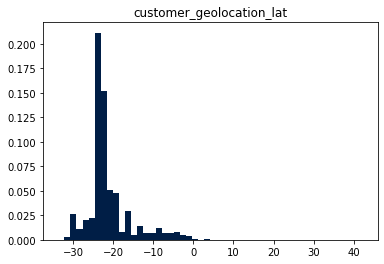

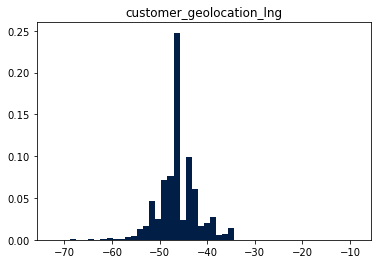

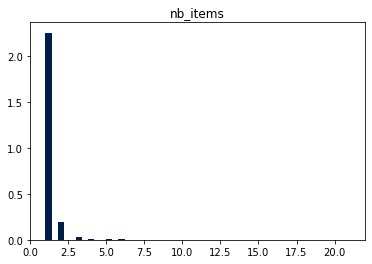

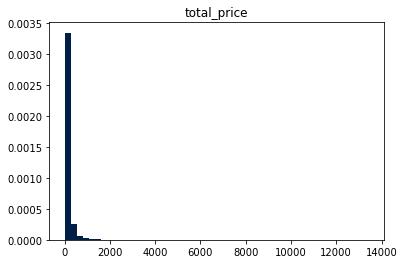

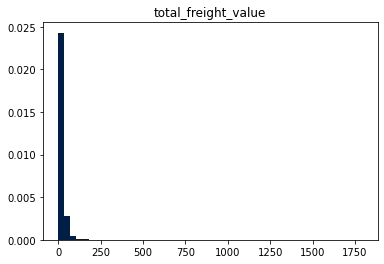

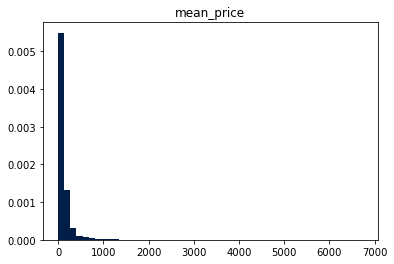

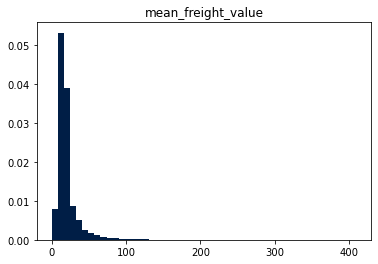

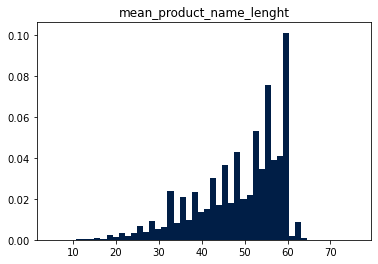

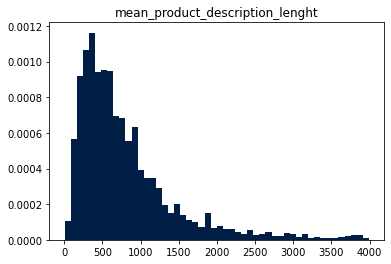

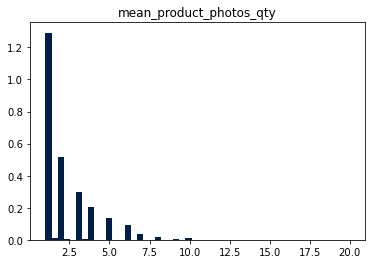

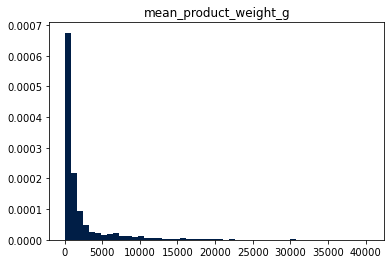

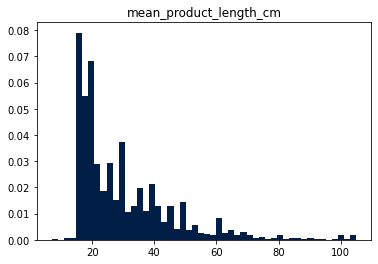

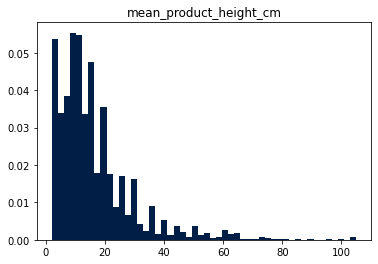

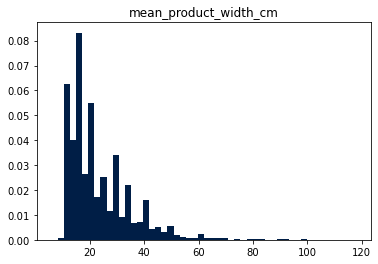

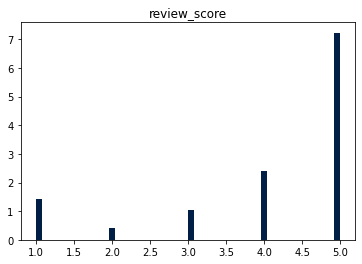

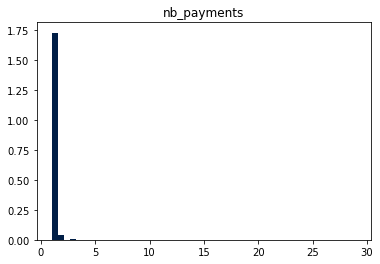

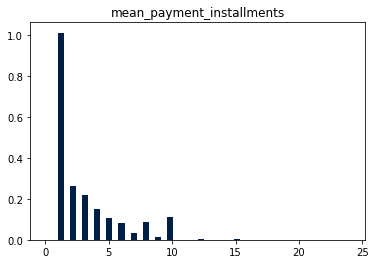

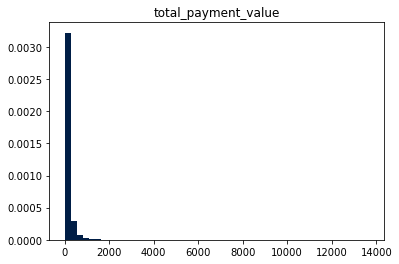

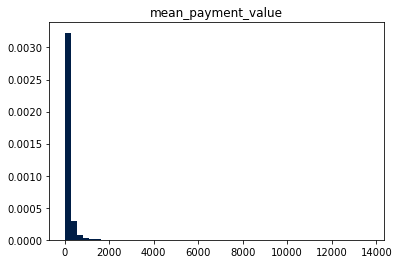

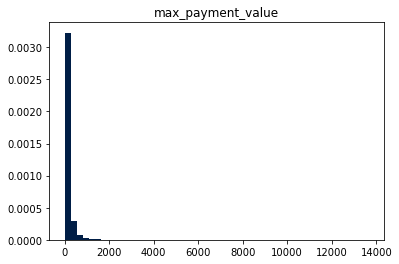

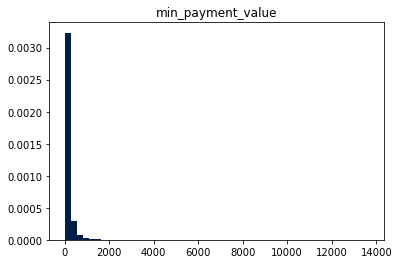

In [111]:
# Looking distributions

numerical_var = list(data.select_dtypes('float').columns)

for var in numerical_var:
    plt.figure()
    plt.hist(data[var], density=True, bins=50, color='#001E46', edgecolor='none')
    plt.title(var)
    plt.show()

### b. Dates

In [112]:
date_columns = list(data.select_dtypes('datetime64').columns)

In [113]:
for col in date_columns:
    print("Variable : {}".format(col))
    print("Min : {}".format(data[col].min()))
    print("Max : {}".format(data[col].max()))
    print("Mean : {}".format(data[col].mean()))
    print("Median : {}".format(data[col].median()))
    print("----------------------------------------------")

Variable : order_purchase_timestamp
Min : 2016-09-04 21:15:19
Max : 2018-10-17 17:30:18
Mean : 2017-12-31 08:43:12.776581120
Median : 2018-01-18 23:04:36
----------------------------------------------
Variable : order_approved_at
Min : 2016-09-15 12:16:38
Max : 2018-09-03 17:40:06
Mean : 2017-12-31 18:35:24.098800384
Median : 2018-01-19 11:36:13
----------------------------------------------
Variable : order_delivered_carrier_date
Min : 2016-10-08 10:34:01
Max : 2018-09-11 19:48:28
Mean : 2018-01-04 21:49:48.138278400
Median : 2018-01-24 16:10:58
----------------------------------------------
Variable : order_delivered_customer_date
Min : 2016-10-11 13:46:32
Max : 2018-10-17 13:22:46
Mean : 2018-01-14 12:09:19.035542272
Median : 2018-02-02 19:28:10.500000
----------------------------------------------
Variable : order_estimated_delivery_date
Min : 2016-09-30 00:00:00
Max : 2018-11-12 00:00:00
Mean : 2018-01-24 03:08:37.730111232
Median : 2018-02-15 00:00:00
----------------------------

In [114]:
# Dates should be between 2016 and 2018, for the variable shipping_limit_date we have values above 2018. Let's check it

data[data['shipping_limit_date'] > pd._libs.tslibs.timestamps.Timestamp('2018-12-31 23:59:59')]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
9742,22e922696a7d1ab9a19c6b702fedc387,b030929cf3b8c3370ea8c611f9ccb32e,71905,brasilia,DF,NaN,NaN,9c94a4ea2f7876660fa6f1b59b69c8e6,shipped,2017-03-14 19:23:22,2017-03-14 19:23:22,2017-03-16 14:31:15,NaT,2017-08-04,[282b126b2354516c5f400154398f616d],[7a241947449cc45dbfda4f9d0798d9d0],2020-02-03 20:23:22,1.0,75.99,14.70,75.99,14.70,housewares,48.0,2396.0,2.0,3700.0,20.0,20.0,20.0,89ca32f678121dc844cafc2b4b2c73a2,1.0,NaN,Não recebi até hoje o produto depois de mais d...,2017-05-17,2017-05-17 22:04:19,1.0,boleto,1.0,90.69,90.69,90.69,90.69
25211,b279a1d441c73c1974d7a63618855aa0,3977f83a14549e6265bcded84e92ee80,21210,rio de janeiro,RJ,-22.843731,-43.302427,13bdf405f961a6deec817d817f5c6624,canceled,2017-03-16 02:30:51,2017-03-16 02:30:51,NaT,NaT,2017-08-08,[96ea060e41bdecc64e2de00b97068975],[7a241947449cc45dbfda4f9d0798d9d0],2020-02-05 03:30:51,1.0,69.99,14.66,69.99,14.66,housewares,45.0,1875.0,4.0,5150.0,70.0,9.0,40.0,bacc1646cb86b3bb80da5e0bc79b6f69,1.0,NaN,NaN,2017-08-11,2017-08-11 16:52:36,1.0,boleto,1.0,84.65,84.65,84.65,84.65
41582,6357fffb5704244d552615bbfcea1442,44b6bbfea26596437062a38c8e6bcec1,15040,sao jose do rio preto,SP,-20.799615,-49.415358,c2bb89b5c1dd978d507284be78a04cb2,delivered,2017-05-23 22:28:36,2017-05-24 22:35:08,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,"[87b92e06b320e803d334ac23966c80b1, 87b92e06b32...","[7a241947449cc45dbfda4f9d0798d9d0, 7a241947449...",2020-04-09 22:35:08,2.0,199.98,122.88,99.99,61.44,housewares,58.0,914.0,5.0,15000.0,35.0,30.0,25.0,6afeab17c60f9f9402bbf93abdce63e3,5.0,NaN,NaN,2017-06-10,2017-06-12 13:24:30,1.0,credit_card,15.0,322.86,322.86,322.86,322.86


All values are from the same seller. The limit date is surprising but possible (the seller gave on purpose a date far to respect it ?)

### c. Categorical

In [115]:
data.dtypes

customer_id                                object
customer_unique_id                         object
customer_zip_code_prefix                    int64
customer_city                              object
customer_state                             object
customer_geolocation_lat                  float64
customer_geolocation_lng                  float64
order_id                                   object
order_status                               object
order_purchase_timestamp           datetime64[ns]
order_approved_at                  datetime64[ns]
order_delivered_carrier_date       datetime64[ns]
order_delivered_customer_date      datetime64[ns]
order_estimated_delivery_date      datetime64[ns]
product_id                                 object
seller_id                                  object
shipping_limit_date                datetime64[ns]
nb_items                                  float64
total_price                               float64
total_freight_value                       float64


In [116]:
categ_var = ['customer_city', 'customer_state', 
             'order_status', 'prefered_product_category_name', 
             'prefered_payment_type']

In [117]:
for var in categ_var:
    print("Variable : {}".format(var))
    print(data[var].unique())
    print("----------------------------------------------")

Variable : customer_city
['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']
----------------------------------------------
Variable : customer_state
['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']
----------------------------------------------
Variable : order_status
['delivered' 'canceled' 'invoiced' 'shipped' 'processing' 'unavailable'
 'approved' 'created']
----------------------------------------------
Variable : prefered_product_category_name
['office_furniture' 'housewares' 'home_confort' 'sports_leisure'
 'computers_accessories' nan 'toys' 'furniture_decor' 'auto'
 'air_conditioning' 'telephony' 'health_beauty' 'garden_tools' 'pet_shop'
 'bed_bath_table' 'baby' 'watches_gifts'
 'kitchen_dining_laundry_garden_furniture' 'perfumery' 'art' 'stationery'
 'fashio_female_clothing' 'consoles_games' 'construction_tools_lights'
 'food_drink' 'drinks' 

In [118]:
# For city variables we can't check manually given the number of occurences
# but we can normalize text to ensure we don't have the same city written in different ways

print('Without normalization')
print('Occurences of customer_city : {}'.format(len(data['customer_city'].unique())))
print('---------------------------------------------')
print('With normalization')
print('Occurences of customer_city : {}'.format(len(data['customer_city'].str.strip().str.lower().unique())))

Without normalization
Occurences of customer_city : 4119
---------------------------------------------
With normalization
Occurences of customer_city : 4119


It doesn't change anything

For other variables, it seems consistent

## III - Missing values <a class="anchor" id="12-bullet"></a>

In [119]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat             278
customer_geolocation_lng             278
order_approved_at                    160
order_delivered_carrier_date        1783
order_delivered_customer_date       2965
product_id                           775
seller_id                            775
shipping_limit_date                  775
nb_items                             775
total_price                          775
total_freight_value                  775
mean_price                           775
mean_freight_value                   775
prefered_product_category_name      2164
mean_product_name_lenght            2164
mean_product_description_lenght     2164
mean_product_photos_qty             2164
mean_product_weight_g                791
mean_product_length_cm               791
mean_product_height_cm               791
mean_product_width_cm                791
review_id                           1285
review_score                        1285
review_comment_title               87932
review_comment_m

In [120]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,[a9516a079e37a9c9c36b9b78b10169e8],[7c67e1448b00f6e969d365cea6b010ab],2017-05-22 15:22:12,1.0,124.99,21.88,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40,1.0,credit_card,2.0,146.87,146.87,146.87,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,[4aa6014eceb682077f9dc4bffebc05b0],[b8bc237ba3788b23da09c0f1f3a3288c],2018-01-18 20:58:32,1.0,289.00,46.48,289.00,46.48,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29,1.0,credit_card,8.0,335.48,335.48,335.48,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,[bd07b66896d6f1494f5b86251848ced7],[7c67e1448b00f6e969d365cea6b010ab],2018-06-05 16:19:10,1.0,139.94,17.79,139.94,17.79,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15 12:10:59,1.0,credit_card,7.0,157.73,157.73,157.73,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,[a5647c44af977b148e0a3a4751a09e2e],[7c67e1448b00f6e969d365cea6b010ab],2018-03-27 16:31:16,1.0,149.94,23.36,149.94,23.36,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47,1.0,credit_card,1.0,173.30,173.30,173.30,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,[9391a573abe00141c56e38d84d7d5b3b],[4a3ca9315b744ce9f8e9374361493884],2018-07-31 10:10:09,1.0,230.00,22.25,230.00,22.25,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,1.0,credit_card,8.0,252.25,252.25,252.25,252.25


We can fix :
- location looking to correspondings zip codes manually
- for reviews, creation of 'not applicable'
- for orders dates, creation of 'not applicable'
- payment, only one missing value

We probably can't fix (except maybe later with imputation) :
- missing times informations
- missing products informations

### a. Reviews

In [121]:
# When we have a NaN value for reviews variables, we can assume it means the customer didn't make a review. 
# We will replace NaN by 'Not applicable'

review_var = ['review_id', 'review_score', 
              'review_comment_title', 'review_comment_message', 
              'review_creation_date', 'review_answer_timestamp']

for var in review_var:
    data.loc[data[var].isna(), var] = 'Not applicable'

In [122]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat            278
customer_geolocation_lng            278
order_approved_at                   160
order_delivered_carrier_date       1783
order_delivered_customer_date      2965
product_id                          775
seller_id                           775
shipping_limit_date                 775
nb_items                            775
total_price                         775
total_freight_value                 775
mean_price                          775
mean_freight_value                  775
prefered_product_category_name     2164
mean_product_name_lenght           2164
mean_product_description_lenght    2164
mean_product_photos_qty            2164
mean_product_weight_g               791
mean_product_length_cm              791
mean_product_height_cm              791
mean_product_width_cm               791
nb_payments                           1
prefered_payment_type                 1
mean_payment_installments             1
total_payment_value                   1


### b. Payment

In [123]:
# Looking missing value
data[data['nb_payments'].isna()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,-20.585751,-47.863693,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,"[5a6b04657a4c5ee34285d1e4619a96b4, 5a6b04657a4...","[ecccfa2bb93b34a3bf033cc5d1dcdc69, ecccfa2bb93...",2016-09-19 23:11:33,3.0,134.97,8.49,44.99,2.83,health_beauty,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,6916ca4502d6d3bfd39818759d55d536,1.0,Not applicable,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# Only one missing values, we can drop this row
data.dropna(subset=['nb_payments'], inplace=True)

In [125]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat            278
customer_geolocation_lng            278
order_approved_at                   160
order_delivered_carrier_date       1783
order_delivered_customer_date      2965
product_id                          775
seller_id                           775
shipping_limit_date                 775
nb_items                            775
total_price                         775
total_freight_value                 775
mean_price                          775
mean_freight_value                  775
prefered_product_category_name     2164
mean_product_name_lenght           2164
mean_product_description_lenght    2164
mean_product_photos_qty            2164
mean_product_weight_g               791
mean_product_length_cm              791
mean_product_height_cm              791
mean_product_width_cm               791
dtype: int64

### c. Orders

We have missing values for order_delivered_customer_date and order_delivered_carrier_date. This could be because the order hasn't been delivered, let's check

In [126]:
# We create 2 dfs with missing values for simplification of next steps
missing_order_delivered_carrier_date = data[data['order_delivered_carrier_date'].isna()]
missing_order_delivered_customer_date = data[data['order_delivered_customer_date'].isna()]

# Looking status for missing values
print(missing_order_delivered_carrier_date['order_status'].unique())
print('')
print(missing_order_delivered_customer_date['order_status'].unique())

['canceled' 'invoiced' 'processing' 'unavailable' 'approved' 'created'
 'delivered']

['canceled' 'invoiced' 'shipped' 'processing' 'unavailable' 'approved'
 'delivered' 'created']


In [127]:
# For order_delivered_carrier_date we can assume it makes sense that we have NaN values if the order isn't delivered
# Let's check if we have delivered orders without values

missing_order_delivered_carrier_date[missing_order_delivered_carrier_date['order_status'] == 'delivered']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
86959,afeb16c7f46396c0ed54acb45ccaaa40,a2ac81ecc3704410ae240e74d4f0af40,13334,indaiatuba,SP,-23.082208,-47.203433,2aa91108853cecb43c84a5dc5b277475,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,[44c2baf621113fa7ac95fa06b4afbc68],[3f2af2670e104d1bcb54022274daeac5],2017-10-18 10:07:16,1.0,179.0,14.98,179.0,14.98,furniture_decor,54.0,984.0,2.0,7000.0,16.0,50.0,55.0,e945d1831a3d98008913fc31dcbb804d,5.0,Not applicable,Not applicable,2017-10-17 00:00:00,2017-10-17 10:56:02,1.0,credit_card,1.0,193.98,193.98,193.98,193.98
97677,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,-30.033566,-51.162560,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23,[30b5b5635a79548a48d04162d971848f],[f9bbdd976532d50b7816d285a22bd01e],2017-06-04 23:30:16,1.0,179.0,15.00,179.0,15.00,sports_leisure,43.0,1873.0,2.0,900.0,26.0,26.0,26.0,4e755f114e50d33b9ac6a56e0d7d3ea9,5.0,Not applicable,Not applicable,2017-06-25 00:00:00,2017-06-27 01:49:04,1.0,credit_card,4.0,194.00,194.00,194.00,194.00


In [128]:
# We have only 2 rows, we will delete them

index_list = missing_order_delivered_carrier_date[missing_order_delivered_carrier_date['order_status'] == 'delivered'].index

data.drop(index_list, inplace=True)

In [129]:
# For other values, we will create 'Not applicable'

data.loc[data['order_delivered_carrier_date'].isna(), 'order_delivered_carrier_date'] = 'Not applicable'

In [130]:
# Same check for order_delivered_customer_date

missing_order_delivered_customer_date[missing_order_delivered_customer_date['order_status'] == 'delivered']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,shipping_limit_date,nb_items,total_price,total_freight_value,mean_price,mean_freight_value,prefered_product_category_name,mean_product_name_lenght,mean_product_description_lenght,mean_product_photos_qty,mean_product_weight_g,mean_product_length_cm,mean_product_height_cm,mean_product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,nb_payments,prefered_payment_type,mean_payment_installments,total_payment_value,mean_payment_value,max_payment_value,min_payment_value
9034,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,-23.293915,-48.057538,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16,[2167c8f6252667c0eb9edd51520706a1],[0bb738e4d789e63e2267697c42d35a2d],2018-06-26 07:19:05,1.0,329.00,25.24,329.00,25.24,industry_commerce_and_business,48.0,1581.0,1.0,7750.0,36.0,51.0,18.0,c0dd6bec0375c376f044af102118526f,5.0,Entrega super rápida.,"Produto novo, muito bom.",2018-06-29 00:00:00,2018-06-29 16:26:37,1.0,debit_card,1.0,354.24,354.24,354.24,354.24
12030,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,-23.691430,-46.382238,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19,[55bfa0307d7a46bed72c492259921231],[343e716476e3748b069f980efbaa294e],2018-07-03 16:29:30,1.0,45.90,9.07,45.90,9.07,books_general_interest,43.0,838.0,1.0,550.0,26.0,7.0,36.0,d055795a562efffefe47ef81e5435322,5.0,Muito bom,Adorei,2018-07-06 00:00:00,2018-07-06 20:30:17,1.0,credit_card,1.0,54.97,54.97,54.97,54.97
13357,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,-22.888249,-45.376194,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30,[e7d5464b94c9a5963f7c686fc80145ad],[58f1a6197ed863543e0136bdedb3fce2],2018-07-05 17:15:12,1.0,139.00,19.07,139.00,19.07,watches_gifts,42.0,938.0,5.0,275.0,16.0,14.0,14.0,25e11638a3d01a87e8e62338a39eee28,5.0,Not applicable,Not applicable,2018-07-11 00:00:00,2018-07-11 19:27:46,1.0,credit_card,3.0,158.07,158.07,158.07,158.07
51668,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,-23.166262,-47.746689,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18,[a50acd33ba7a8da8e9db65094fa990a4],[8581055ce74af1daba164fdbd55a40de],2017-12-04 17:56:40,1.0,117.30,17.53,117.30,17.53,auto,53.0,555.0,1.0,4105.0,67.0,10.0,67.0,f48c6c944a5d52dcca8ac5c4ec417cf2,5.0,Not applicable,Chegou rápido tudo ok,2017-12-19 00:00:00,2017-12-19 04:15:39,1.0,credit_card,3.0,134.83,134.83,134.83,134.83
85377,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,-23.446492,-46.408626,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26,[a2a7efc985315e86d4f0f705701b342b],[ed4acab38528488b65a9a9c603ff024a],2018-06-18 12:30:35,1.0,110.99,9.13,110.99,9.13,computers_accessories,45.0,837.0,1.0,1133.0,16.0,15.0,20.0,0d4c56af896dd6eb9de8edbaa1902d22,1.0,Péssimo,Comprei um produto de uma marca e recebi outro...,2018-06-16 00:00:00,2018-06-16 13:55:00,1.0,credit_card,5.0,120.12,120.12,120.12,120.12
87172,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,-22.822137,-47.270335,e69f75a717d64fc5ecdfae42b2e8e086,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30,[e7d5464b94c9a5963f7c686fc80145ad],[58f1a6197ed863543e0136bdedb3fce2],2018-07-

In [131]:
# Delete rows and replace others by 'Not applicable'

index_list = list(missing_order_delivered_customer_date[missing_order_delivered_customer_date['order_status'] == 'delivered'].index)
index_list.remove(97677) # Already deleted above

data.drop(index_list, inplace=True)

data.loc[data['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = 'Not applicable'

### --> Voir si possible de remplacer les dates par l'estimé mais ça ne semble pas fonctionner avec les NaT (ça serait plus clean)

In [132]:
data[data.columns[data.isnull().any()]].isna().sum()

customer_geolocation_lat            278
customer_geolocation_lng            278
order_approved_at                   160
product_id                          775
seller_id                           775
shipping_limit_date                 775
nb_items                            775
total_price                         775
total_freight_value                 775
mean_price                          775
mean_freight_value                  775
prefered_product_category_name     2164
mean_product_name_lenght           2164
mean_product_description_lenght    2164
mean_product_photos_qty            2164
mean_product_weight_g               791
mean_product_length_cm              791
mean_product_height_cm              791
mean_product_width_cm               791
dtype: int64

Remaining NaN are actual missing values so we can't manually treat them, we will impute or delete them later for our machine learning algorithm

# 3. Exploratory analysis <a class="anchor" id="13-bullet"></a>

## I - Distributions <a class="anchor" id="14-bullet"></a>

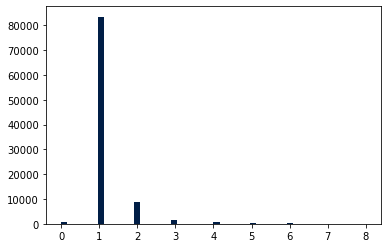

In [174]:
# Distribution of items bought per unique customer

plt.figure()
plt.hist(data.groupby(by='customer_unique_id')['nb_items'].sum(), bins=50, range=(0,8), align='mid', color='#001E46')
plt.show()

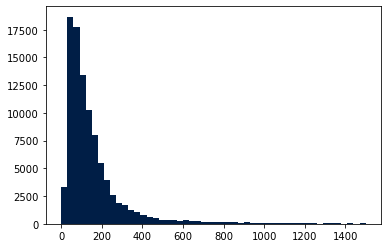

In [173]:
# Distribution of sum payed per unique customer

plt.figure()
plt.hist(data.groupby(by='customer_unique_id')['total_payment_value'].sum(), bins=50, range=(0,1500), color='#001E46')
plt.show()

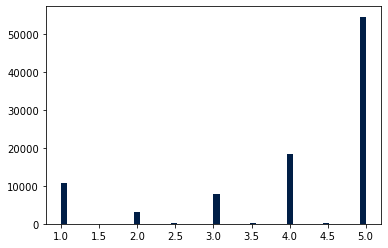

In [172]:
# Distribution of items bought per unique customer

# Need to withdraw 'Not applicable' strings to avoid error
temporary_df = data.drop(data[data['review_score'] == 'Not applicable'].index, axis=0) 

# Plot
plt.figure()
plt.hist(temporary_df.groupby(by='customer_unique_id')['review_score'].mean(), bins=50, color='#001E46')
plt.show()

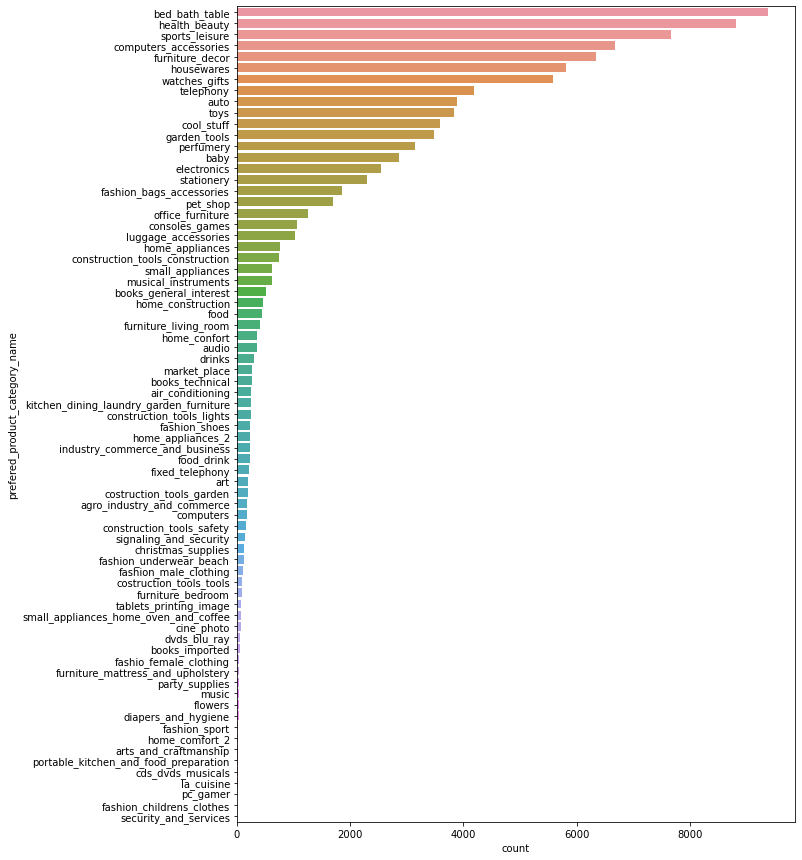

In [175]:
# Distribution of catagories of products bought

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10, 15))
var_order = data['prefered_product_category_name'].value_counts().index
sns.countplot(y='prefered_product_category_name', order=var_order, data=data)
plt.show()

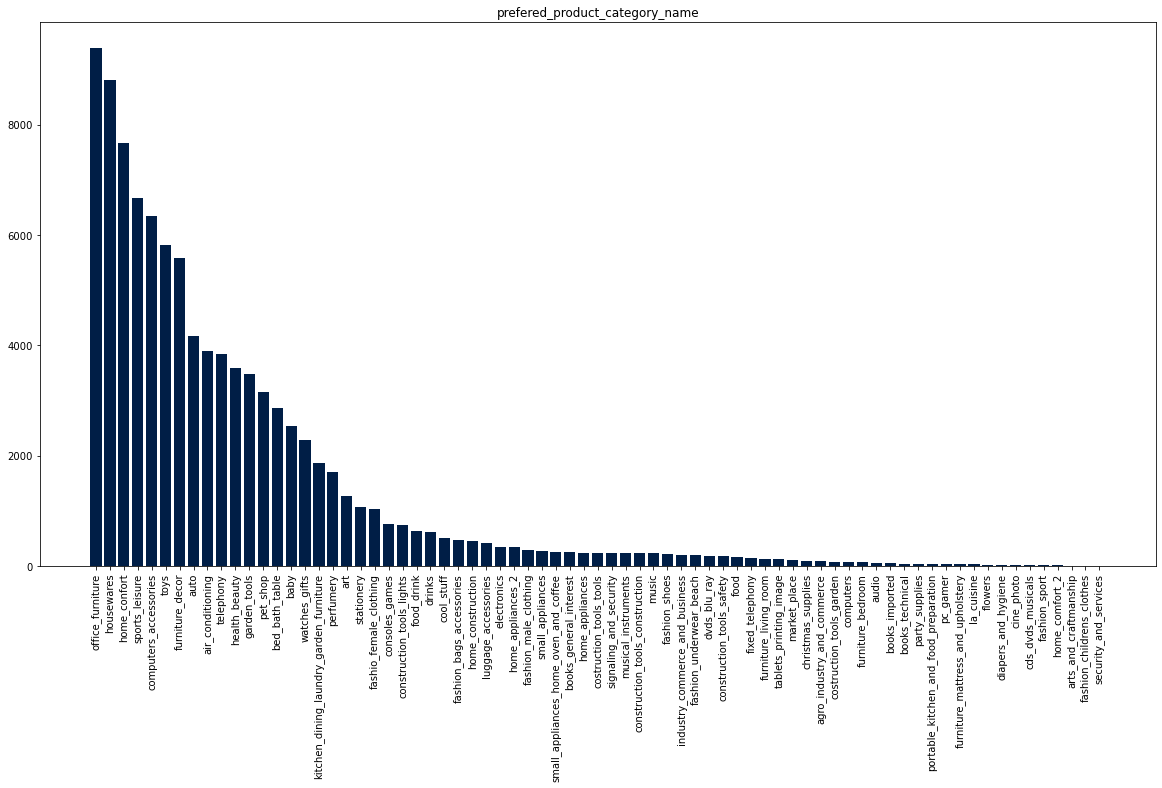

In [178]:
plt.figure(figsize=(20,10))
x = list(data['prefered_product_category_name'].unique())
if np.nan in x:
    x.remove(np.nan)
plt.bar(x, data['prefered_product_category_name'].value_counts(), color='#001E46')
plt.title('prefered_product_category_name')
plt.xticks(rotation=90)
plt.show()

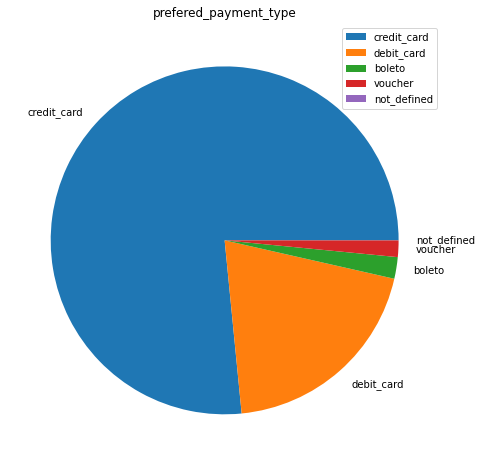

In [208]:
plt.figure(figsize=(8, 8))
plt.pie(data['prefered_payment_type'].value_counts(), labels=data['prefered_payment_type'].unique())
plt.title('prefered_payment_type')
plt.legend()
plt.show()

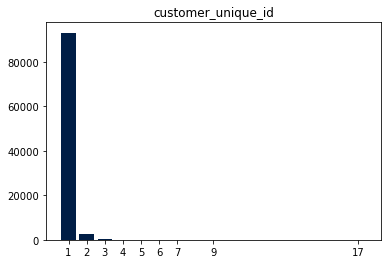

In [190]:
# Distribution of number of orders per customer

ordonnee = data['customer_unique_id'].value_counts().unique()
plt.bar(ordonnee, [(data['customer_unique_id'].value_counts() == a).sum() for a in ordonnee], color='#001E46', align='center')
plt.title('customer_unique_id')
plt.xticks(data['customer_unique_id'].value_counts().unique())
plt.show()

## II - Correlations <a class="anchor" id="15-bullet"></a>

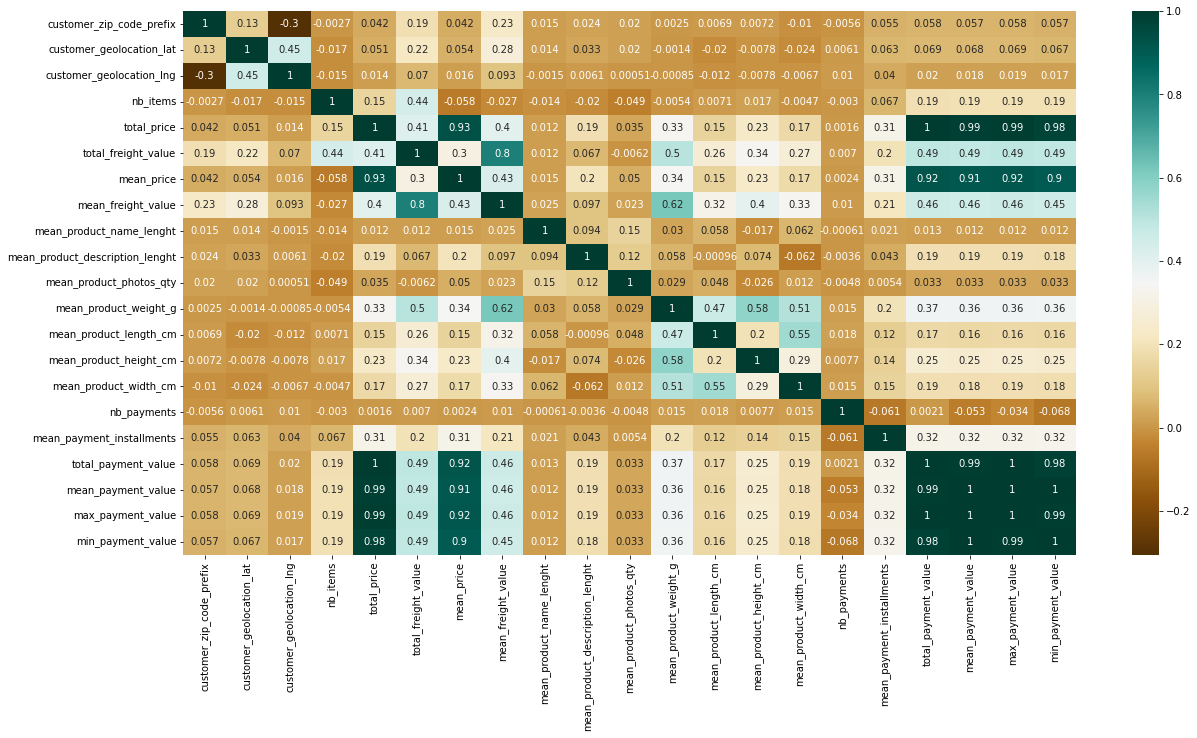

In [209]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='BrBG')
plt.show()

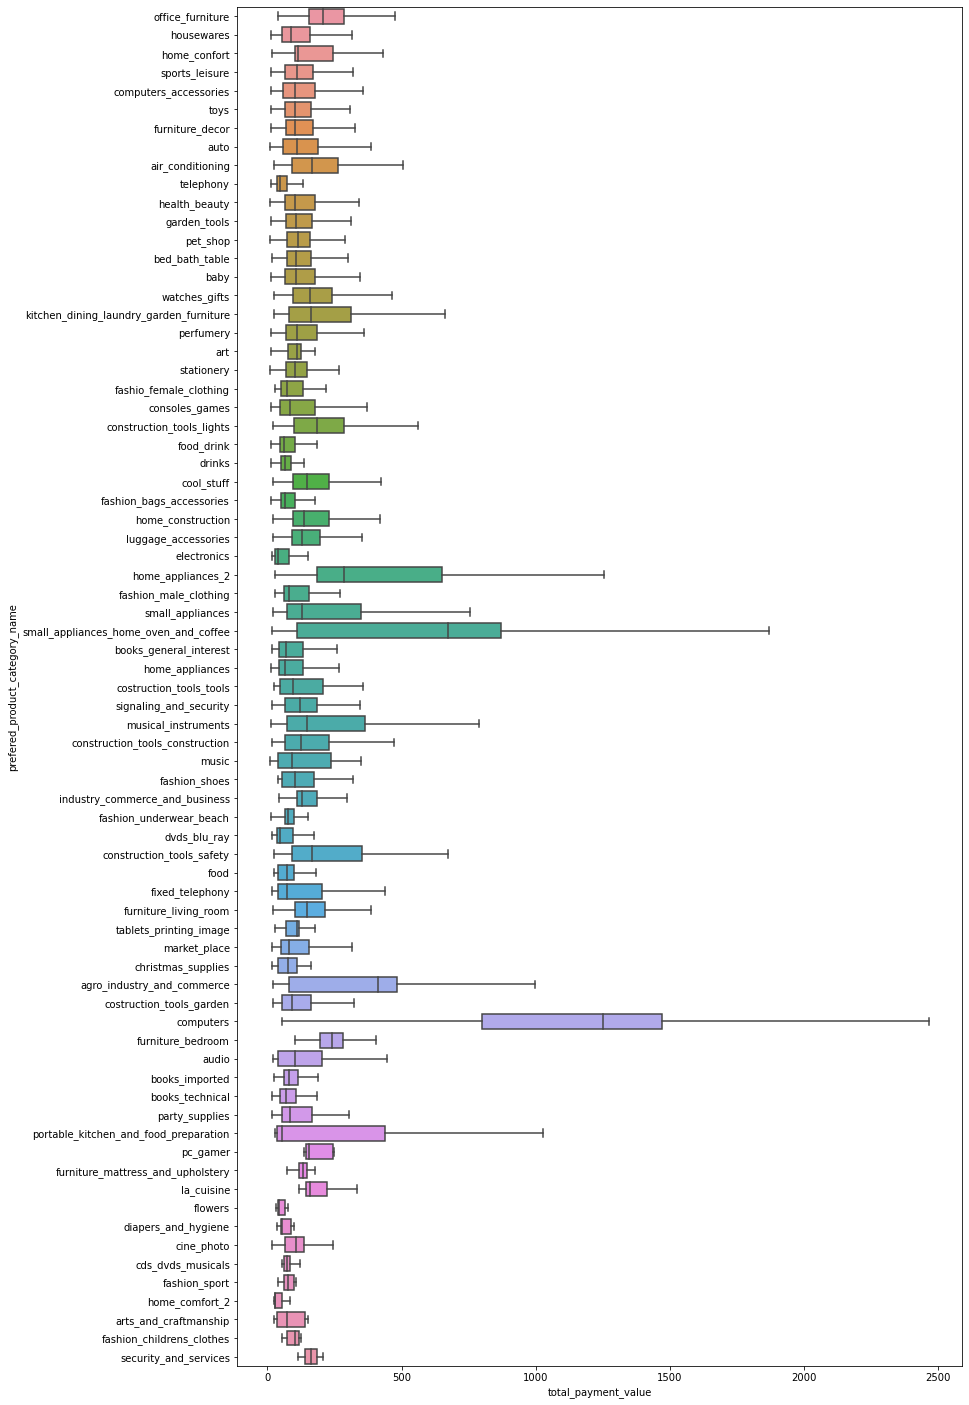

In [225]:
# Boxplot prices distribution per product category

plt.figure(figsize=(13,25))
sns.boxplot(x='total_payment_value', y='prefered_product_category_name', data=data, showfliers=False)
plt.show()

In [226]:
# Saving cleaned data

data.to_csv('cleaned_data.csv')

# Notes --> OLD TBU

The objective would be to extract informations for unique customers (with customer_unique_id) with this dataframe, a lot a feature engineering will be necessary. Some ideas for now :
- Number of orders
- Time for approval of order (diff with purchase time)
- Time for delivery (carrier / customer) of order (diff with purchase time)
- Time for estimated delivery (diff with purchase time)
- Difference estimated / real time of delivery
- Average number of items per order
- Number of orders with the same seller
- Orders with shipping limit overdue
- Average price of orders
- Average freight_value of orders
- % of reviews (creation of var review if review_score not NaN / number of orders)
- Average review score given
- % of comments on review
- Average number of payment_sequential
- Average time of review (diff with delivery time)
- Favorite payment_type
- Average number of payment_installments
- Average payment_value (same as price + freight value ?)
- Favorite product_category_name

Interest of dimensions of objects ?
Interest of location of seller ?

Should look too if a customer changed location, creation of a var moving ?